# Count-Min Sketch

Создается таблица (матрица), заполненная нулями.

Для каждого элемента вычисляется несколько хэш-функций.

Каждая хэш-функция определяет индекс в своей строке таблицы.

В соответствующие ячейки таблицы добавляется значение (обычно 1 или вес элемента).

Для оценки частоты элемента снова вычисляются те же хэш-функции. Возвращается минимальное значение из всех соответствующих ячеек таблицы.

Возможны ложноположительные срабатывания (оценка может быть завышена). Точность зависит от ширины таблицы и количества хэш-функций.

In [4]:
import mmh3
import random
import numpy as np

class CountMinSketch:
    def __init__(self, width, depth):
        self.width = width  # количество столбцов в таблице
        self.depth = depth  # количество хэш-функций (строк)
        self.table = np.zeros((depth, width), dtype=int)

    def add(self, item, count=1):
        for i in range(self.depth):
            index = mmh3.hash(item, i) % self.width
            self.table[i][index] += count

    def estimate(self, item):
        min_count = float('inf')
        for i in range(self.depth):
            index = mmh3.hash(item, i) % self.width
            if self.table[i][index] < min_count:
                min_count = self.table[i][index]
        return min_count

# Пример использования
width = 1000
depth = 5
cms = CountMinSketch(width, depth)

# Добавляем элементы
items = ["apple", "banana", "orange", "apple", "banana", "apple"]
for item in items:
    cms.add(item)

# Оцениваем частоту
print("Estimated count for 'apple':", cms.estimate("apple"))
print("Estimated count for 'banana':", cms.estimate("banana"))
print("Estimated count for 'orange':", cms.estimate("orange"))

Estimated count for 'apple': 3
Estimated count for 'banana': 2
Estimated count for 'orange': 1


In [5]:
from collections import defaultdict

# Реальная частота элементов
real_counts = defaultdict(int)
for item in items:
    real_counts[item] += 1

# Оценка ложноположительных срабатываний
false_positives = 0
total = 0

for item in set(items):
    estimated = cms.estimate(item)
    real = real_counts[item]
    if estimated > real:
        false_positives += 1
    total += 1

false_positive_rate = (false_positives / total) * 100
print(f"False positive rate: {false_positive_rate:.2f}%")

False positive rate: 0.00%


Width: 1, Depth: 1, False Positive Rate: 100.00%
Width: 1, Depth: 2, False Positive Rate: 100.00%
Width: 1, Depth: 3, False Positive Rate: 100.00%
Width: 1, Depth: 5, False Positive Rate: 100.00%
Width: 2, Depth: 1, False Positive Rate: 66.67%
Width: 2, Depth: 2, False Positive Rate: 33.33%
Width: 2, Depth: 3, False Positive Rate: 0.00%
Width: 2, Depth: 5, False Positive Rate: 0.00%
Width: 3, Depth: 1, False Positive Rate: 0.00%
Width: 3, Depth: 2, False Positive Rate: 0.00%
Width: 3, Depth: 3, False Positive Rate: 0.00%
Width: 3, Depth: 5, False Positive Rate: 0.00%
Width: 10, Depth: 1, False Positive Rate: 66.67%
Width: 10, Depth: 2, False Positive Rate: 0.00%
Width: 10, Depth: 3, False Positive Rate: 0.00%
Width: 10, Depth: 5, False Positive Rate: 0.00%


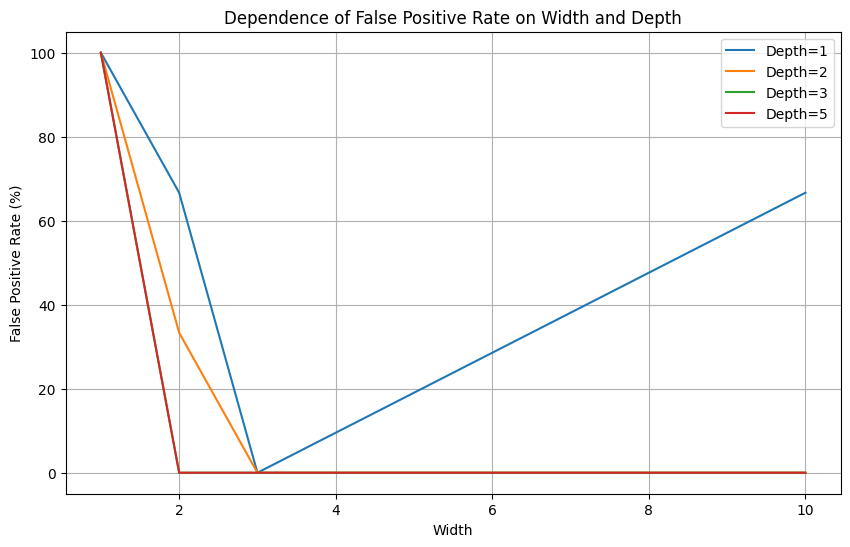

In [11]:
import matplotlib.pyplot as plt

# Функция для оценки ложноположительных срабатываний
def evaluate_false_positives(width, depth, items):
    cms = CountMinSketch(width, depth)
    real_counts = defaultdict(int)
    
    for item in items:
        cms.add(item)
        real_counts[item] += 1
    
    false_positives = 0
    total = 0
    
    for item in set(items):
        estimated = cms.estimate(item)
        real = real_counts[item]
        if estimated > real:
            false_positives += 1
        total += 1
    
    return (false_positives / total) * 100

# Эксперимент с разными значениями width и depth
widths = [1, 2, 3, 10]
depths = [1, 2, 3, 5]
results = {}

for width in widths:
    for depth in depths:
        false_positive_rate = evaluate_false_positives(width, depth, items)
        results[(width, depth)] = false_positive_rate
        print(f"Width: {width}, Depth: {depth}, False Positive Rate: {false_positive_rate:.2f}%")

# Визуализация результатов
widths = sorted(list(set([w for w, d in results.keys()])))
depths = sorted(list(set([d for w, d in results.keys()])))

plt.figure(figsize=(10, 6))
for depth in depths:
    rates = [results[(width, depth)] for width in widths]
    plt.plot(widths, rates, label=f"Depth={depth}")

plt.xlabel("Width")
plt.ylabel("False Positive Rate (%)")
plt.title("Dependence of False Positive Rate on Width and Depth")
plt.legend()
plt.grid()
plt.show()